# NMF (Nonnegative matrix factorization)

Here, NMF is employed on 18 topics based on the coherence graph obtained earlier. The KL Divergence Heatmap and Document Topic Matrix is visualised and the quality of the topics is evaluated. Aditionally, a Logistic Regression Model is employed to evaluate the Topic Modelling Technique further.

In [1]:
import pandas as pd
import os
os.chdir('D:/Down') #Replace the location to where the output.csv file is stored.
df = pd.read_csv('output.csv')

In [2]:
pip install nltk #Install necessary libraries

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gensim
import nltk
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import spacy
nltk.download('stopwords')
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = df.head(50000)

Before employing LDA, the captions are preprocessed. This includes tokenisation, stemming, stopword removal, bigram modelling, and lemmatization. This is carried out using NLTK (Natural Language ToolKit)

In [6]:
from nltk.tokenize import word_tokenize
#tokenisation
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text.lower())
    elif isinstance(text, list):
        return [word_tokenize(str(item).lower()) for item in text]
    else:
        return []

In [7]:
import pandas as pd
from nltk.stem import SnowballStemmer
#stemming
stemmer = SnowballStemmer('english')

def stem_text(tokens):
    if isinstance(tokens, str):  
        return stemmer.stem(tokens)
    elif isinstance(tokens, list): 
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        return stemmed_tokens
    else:
        return []


In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
#remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    if isinstance(tokens, str):  
        if tokens not in stop_words:
            return [tokens]
        else:
            return []
    elif isinstance(tokens, list):  
        filtered_tokens = [token for token in tokens if token not in stop_words]
        return filtered_tokens
    else:
        return []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['Tokens'] = df['Container'].apply(tokenize_text)
df['Tokens'] = df['Tokens'].apply(stem_text)
df['Tokens'] = df['Tokens'].apply(remove_stopwords)

In [10]:
#bigram modelling
bigram = gensim.models.Phrases(df["Tokens"], min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

TF-IDF vectorization is used to convert the documents into a matrix and then NMF is applied to obtain topic representations. 18 topics are chosen.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

documents = [' '.join(tokens) for tokens in df['Tokens']]

vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english') #TF IDF Vectorization
tfidf_matrix = vectorizer.fit_transform(documents)


num_topics = 18  
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)


feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}") #topics are printed with 10 most frequent words


for i in range(num_topics):
    df[f"Topic_{i+1}"] = nmf_matrix[:, i]


Topic 1: pack, amazon, 12, basic, 10, color, white, assort, cotton, ounc
Topic 2: light, led, solar, outdoor, bulb, waterproof, garden, string, patio, yard
Topic 3: shirt, sleev, short, dress, casual, women, neck, long, summer, larg
Topic 4: toy, kid, girl, boy, gift, year, toddler, old, age, game
Topic 5: parti, decor, birthday, balloon, wed, suppli, halloween, tabl, favor, gift
Topic 6: pro, iphon, charger, usb, 13, case, max, charg, compat, cabl
Topic 7: mask, face, dispos, kn95, pli, breathabl, black, protect, 50, filter
Topic 8: bag, travel, backpack, lunch, gallon, trash, tote, gift, storag, larg
Topic 9: sheet, set, bed, piec, soft, deep, queen, pocket, towel, microfib
Topic 10: cover, pillow, throw, sofa, case, protector, couch, bed, inch, blanket
Topic 11: dog, pet, cat, treat, small, chew, larg, puppi, medium, toy
Topic 12: cup, bottl, water, coffe, lid, oz, glass, plastic, stainless, steel
Topic 13: free, protein, gluten, count, oz, powder, non, vitamin, gmo, snack
Topic 14:

In [12]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


The KL Divergence Heatmap is visualised for the 18 topics to evaluate the distinction between the distributions.

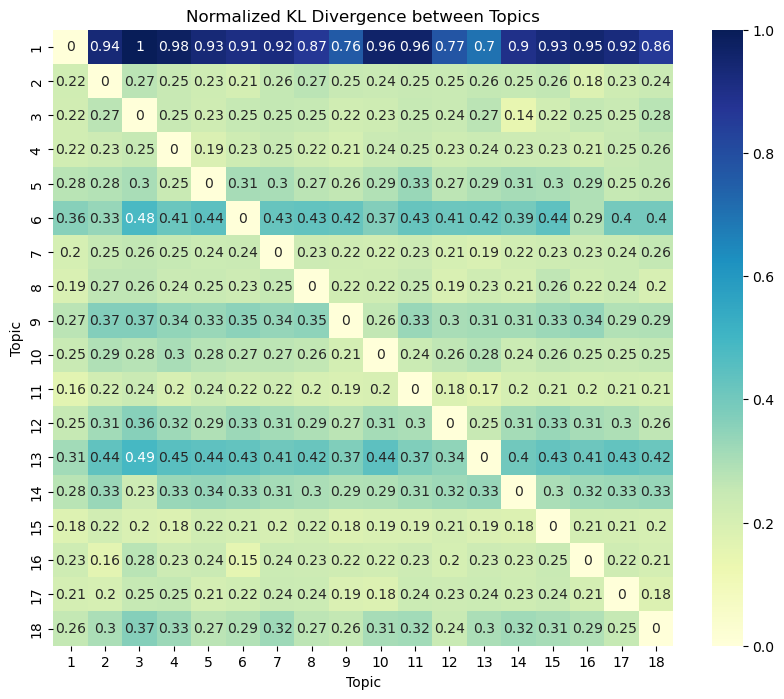

In [39]:
#KL Divergence Heatmap
kl_div_matrix = np.zeros((num_topics, num_topics))
epsilon = 1e-10  
for i in range(num_topics):
    for j in range(num_topics):
        kl_div_matrix[i, j] = kl_divergence(nmf_model.components_[i] + epsilon, nmf_model.components_[j] + epsilon)


kl_div_matrix_normalized = (kl_div_matrix - kl_div_matrix.min()) / (kl_div_matrix.max() - kl_div_matrix.min())


plt.figure(figsize=(10, 8))
sns.heatmap(kl_div_matrix_normalized, annot=True, cmap="YlGnBu", xticklabels=range(1, num_topics+1), yticklabels=range(1, num_topics+1))
plt.title("Normalized KL Divergence between Topics")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()


Here, the Document-Topic Distribution is visualised.

C:\Users\sahre\AppData\Local\Temp\ipykernel_6252\1861008851.py:6: RuntimeWarning: invalid value encountered in divide
  nmf_matrix_normalized = nmf_matrix / nmf_matrix.sum(axis=1, keepdims=True)


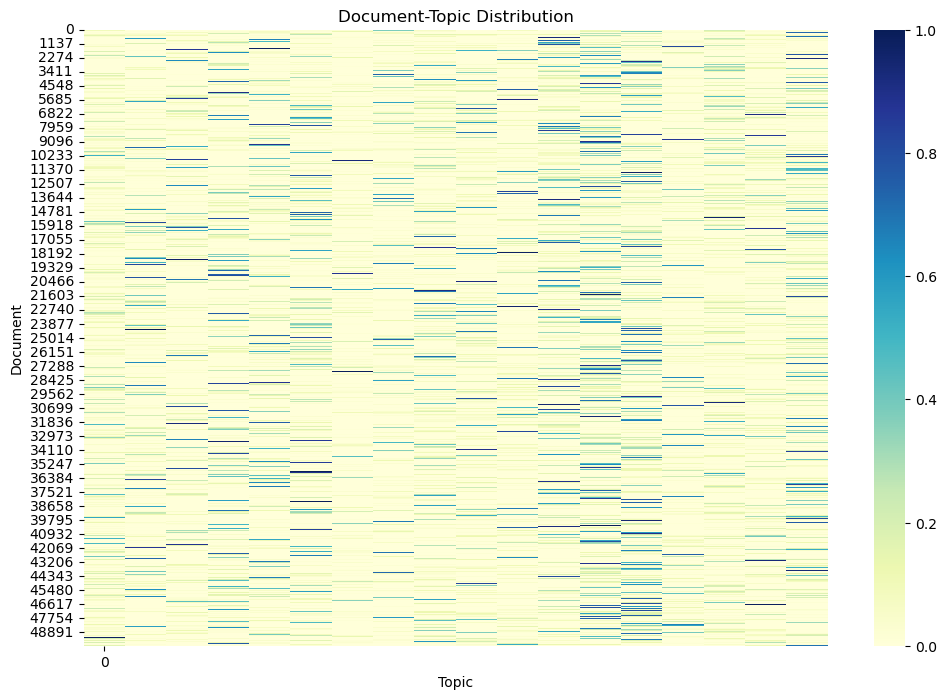

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# Normalize the NMF matrix so that each row sums to 1
nmf_matrix_normalized = nmf_matrix / nmf_matrix.sum(axis=1, keepdims=True)
topics = 18
# Plot Document-Topic Distribution matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nmf_matrix_normalized[:, :], cmap="YlGnBu", xticklabels=topics)
plt.xlabel("Topic")
plt.ylabel("Document")
plt.title("Document-Topic Distribution")
plt.show()


The Dominant Topics are added to a new column in the Dataframe called Dominant Topic. A Logistic Regression Model is used to further evaluate the Topic Modelling Technique. A manual analysis is also carried out by visualising the word clouds for different topics.

In [22]:
pip install wordcloud


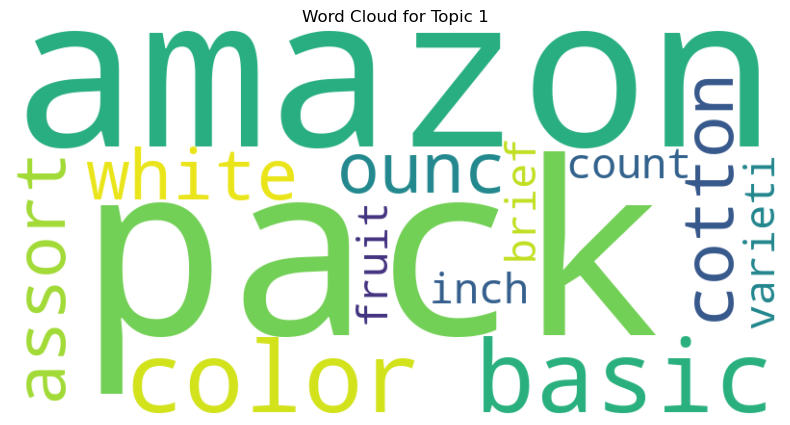

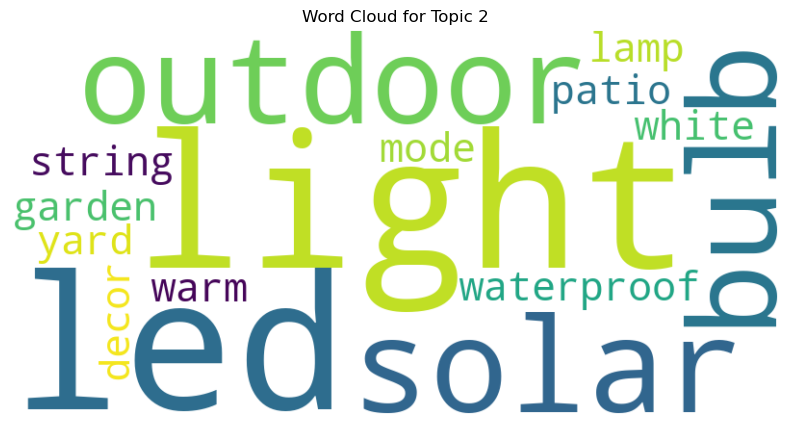

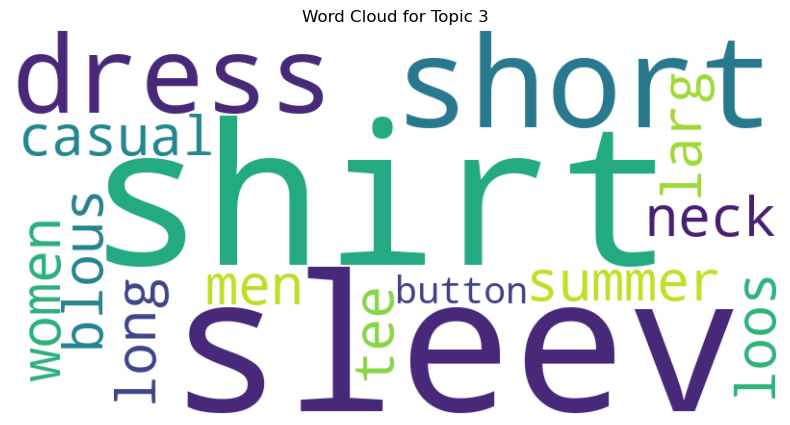

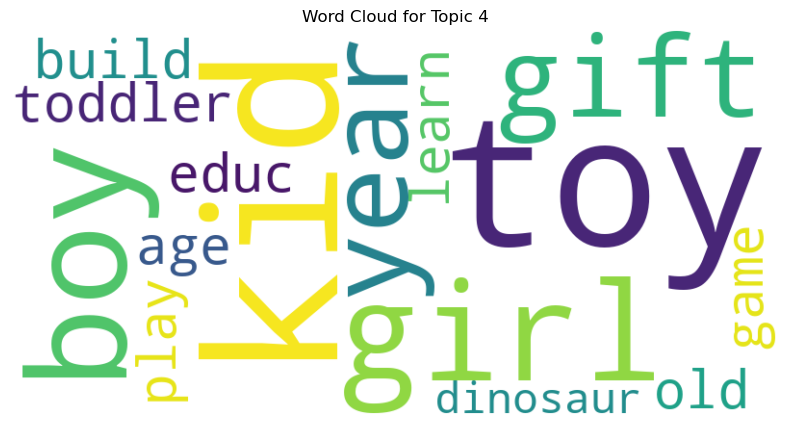

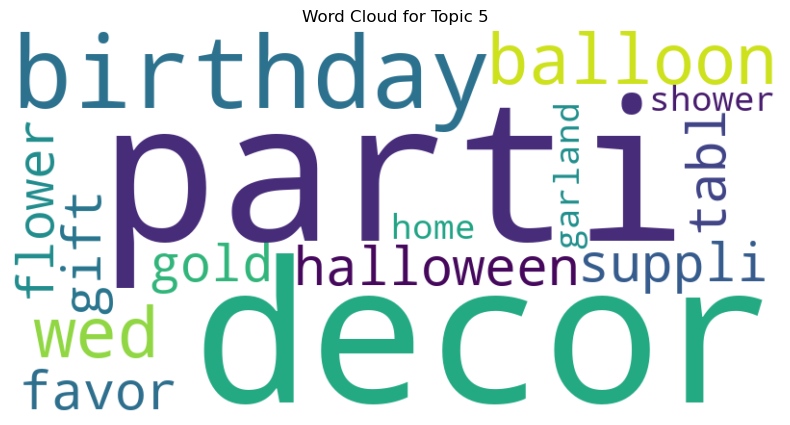

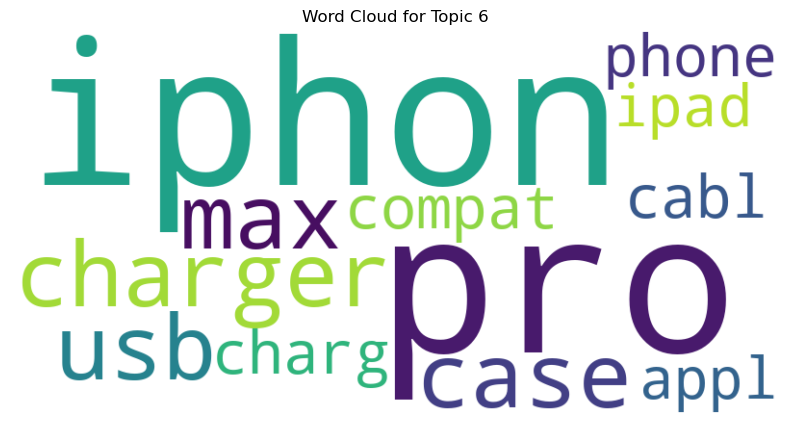

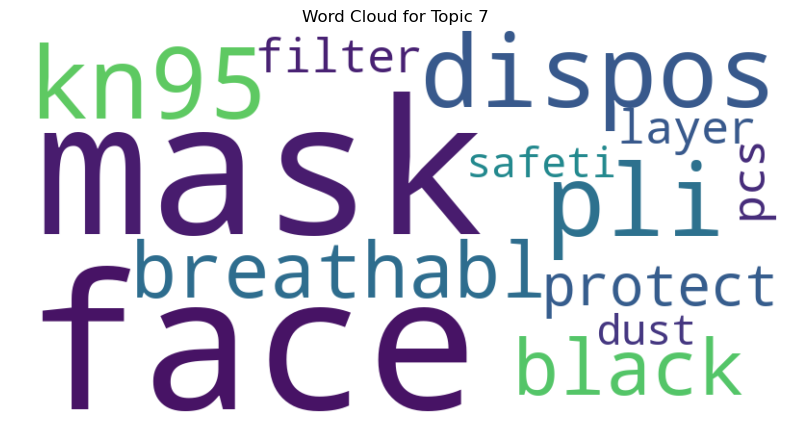

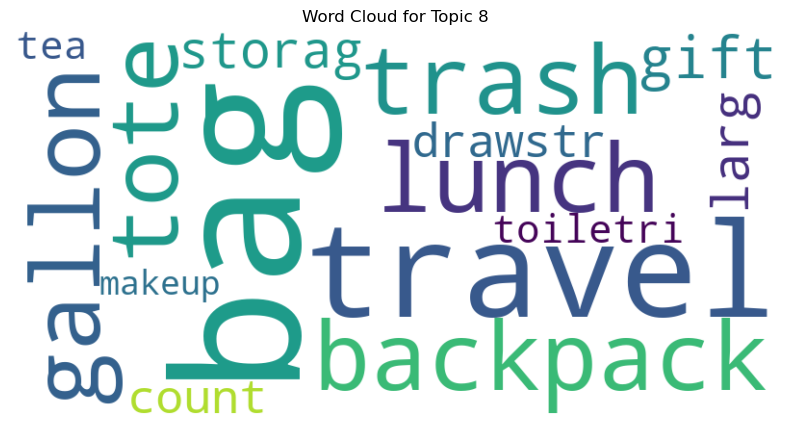

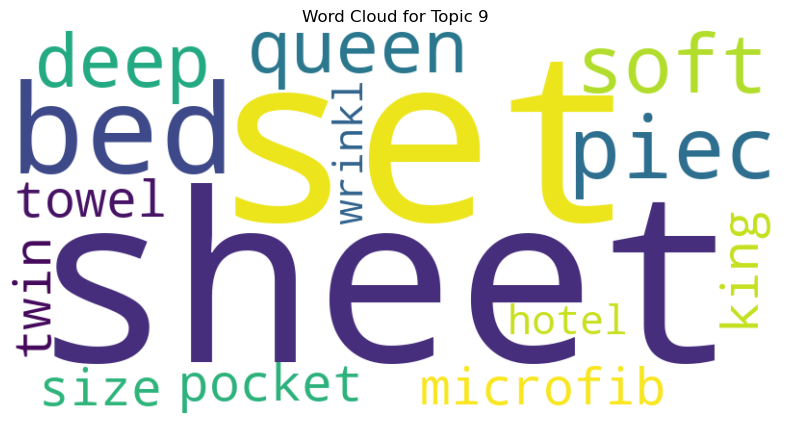

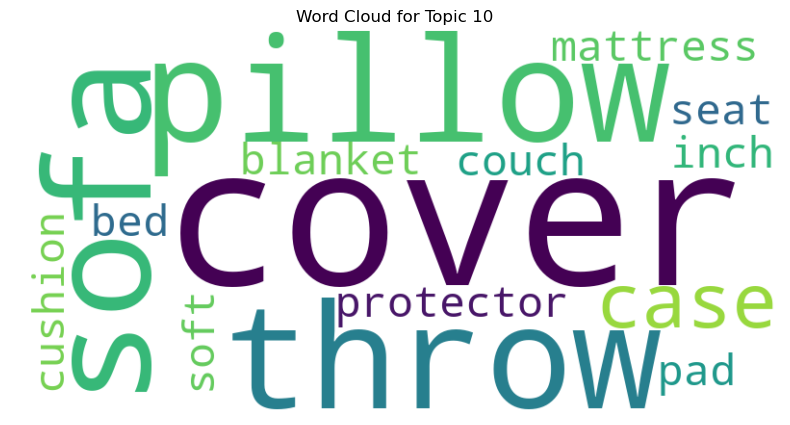

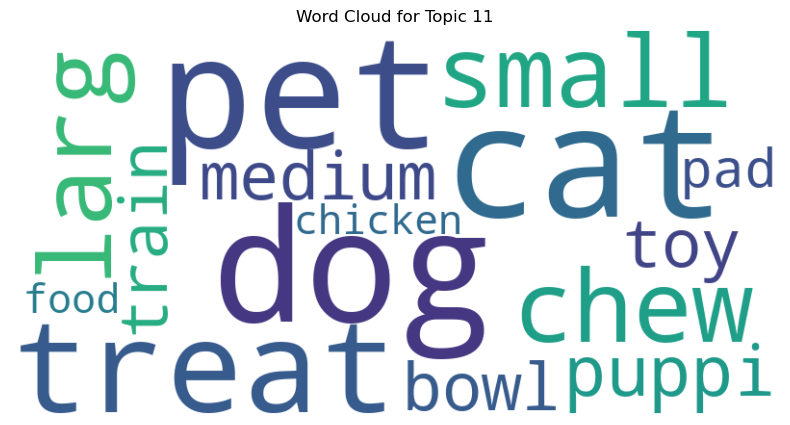

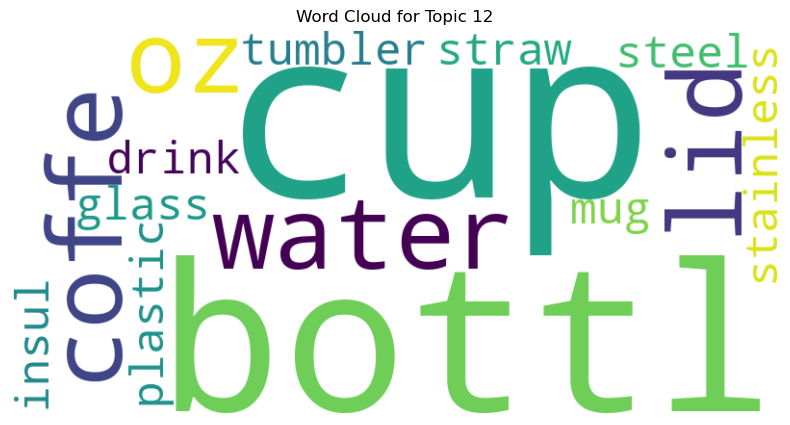

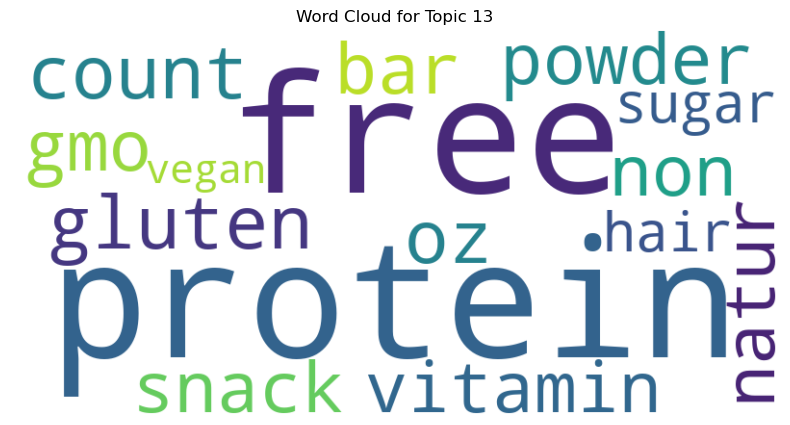

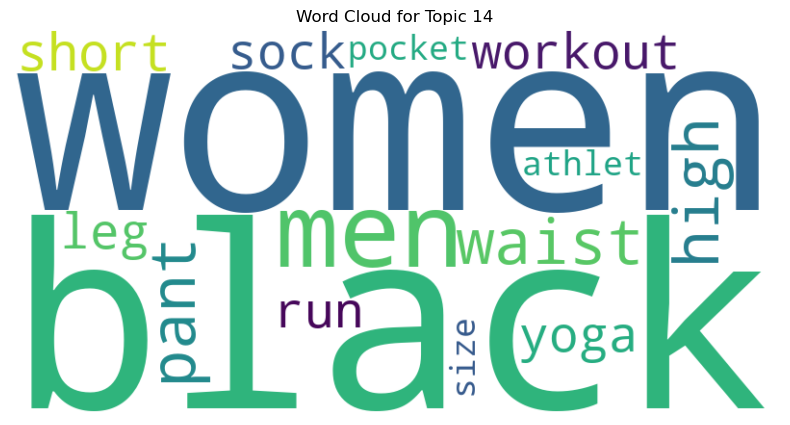

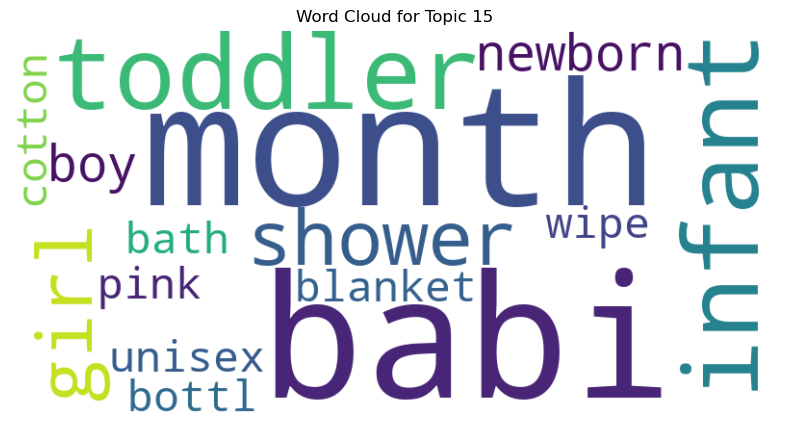

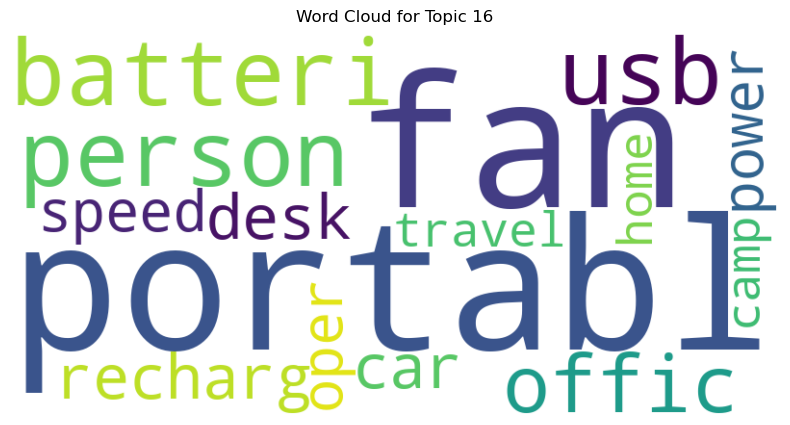

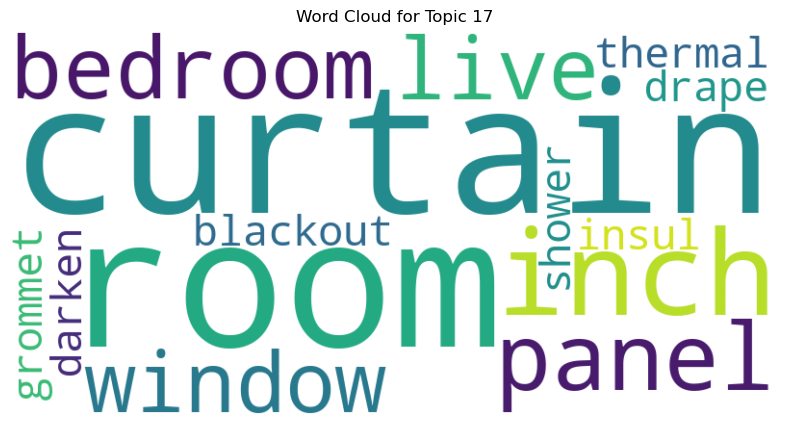

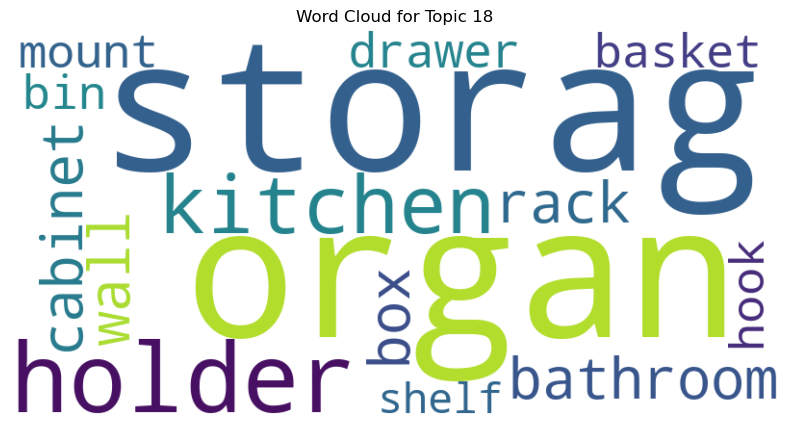

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Generate word cloud for every topic
def generate_word_cloud(topic_matrix, topic_index, feature_names, num_words=15):
    topic = topic_matrix[topic_index]
    topic_words = [feature_names[i] for i in topic.argsort()[:-num_words-1:-1]] 
    wordcloud_text = ' '.join(topic_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_index + 1}")
    plt.show()

for topic_idx in range(18):
    generate_word_cloud(nmf_model.components_, topic_idx, feature_names)


In [14]:
#Assign dominant topics to a new column in the df
import numpy as np
dominant_topics = []
for doc_topic_dist in nmf_matrix:
    dominant_topic = np.argmax(doc_topic_dist)
    dominant_topics.append(dominant_topic)
df['Dominant_Topic'] = dominant_topics


In [17]:
df = df.drop(columns=['Topic_1','Topic_2','Topic_3','Topic_4','Topic_5','Topic_6','Topic_7','Topic_8','Topic_9','Topic_10','Topic_11','Topic_12','Topic_13','Topic_14','Topic_15','Topic_16','Topic_17','Topic_18'])

In [19]:
df = df.drop(columns=['Topic Number', 'Topic Name'])

In [22]:
path = 'D:/Down/output.csv'  # Change this path to your desired location
df.to_csv(path, index=False)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)  
X_train = vectorizer.fit_transform(train_df['Container'])
X_test = vectorizer.transform(test_df['Container'])
#Apply logistic regression to compare the results to other techniques used
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, train_df['Dominant_Topic'])

predictions = logreg.predict(X_test)

accuracy = accuracy_score(test_df['Dominant_Topic'], predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


In [29]:
from sklearn.metrics import classification_report

class_report = classification_report(test_df['Dominant_Topic'], predictions)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       273
           1       0.94      0.89      0.92       664
           2       0.96      0.85      0.90       449
           3       0.81      0.90      0.85       747
           4       0.89      0.89      0.89       563
           5       0.88      0.91      0.90       768
           6       0.98      0.77      0.86       121
           7       0.96      0.91      0.94       371
           8       0.83      0.87      0.85       469
           9       0.90      0.85      0.88       410
          10       0.98      0.88      0.93       331
          11       0.88      0.87      0.87       780
          12       0.83      0.93      0.87      1275
          13       0.90      0.94      0.92      1107
          14       0.96      0.80      0.88       301
          15       0.84      0.79      0.81       368
          16       0.91      0.81      0.85       372
    

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_df['Dominant_Topic'], predictions)
precision = precision_score(test_df['Dominant_Topic'], predictions, average='weighted')
recall = recall_score(test_df['Dominant_Topic'], predictions, average='weighted')
f1 = f1_score(test_df['Dominant_Topic'], predictions, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.88
